In [322]:
import cv2
import numpy as np
from skimage.segmentation import slic # Super Linear Iterative Clusterring
from skimage.segmentation import felzenszwalb, quickshift
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float
from skimage import io
from skimage.measure import regionprops
from skimage.measure import regionprops_table
from skimage.measure import label
import matplotlib.pyplot as plt
from skimage.color import rgb2lab
from skimage import io, color, filters, morphology, measure

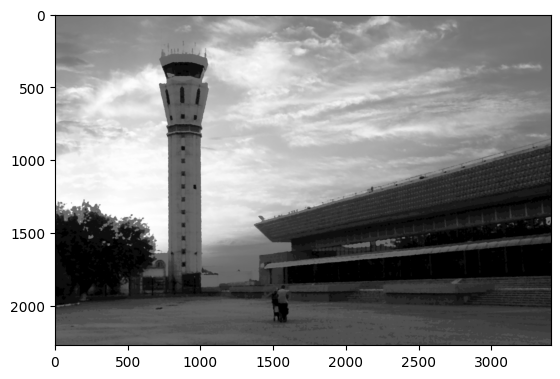

In [368]:
# Load the image
img = cv2.imread('corrupted.png')

img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Apply median filter for noise reduction
img_filtered = cv2.medianBlur(img, 11)

# Apply histogram equalization for contrast enhancement
img_equalized = cv2.equalizeHist(img_filtered)
img_equalized = cv2.cvtColor(img_equalized, cv2.COLOR_GRAY2BGR)

plt.imshow(img_equalized)
plt.show()

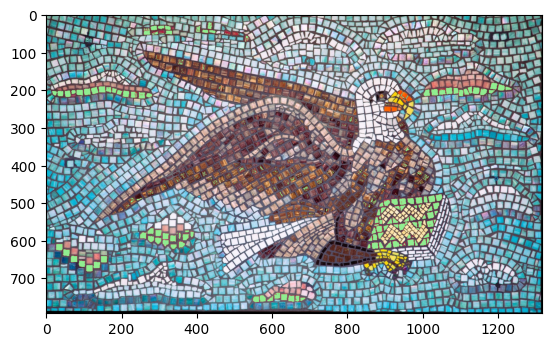

In [369]:
img = cv2.imread('FranklinMascot.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Define the range of red colors to change (in BGR format)
lower_red = np.array([100, 0, 0])
upper_red = np.array([255, 50, 50])

# Create a mask of pixels that are within the specified color range
mask = cv2.inRange(img, lower_red, upper_red)

# Define the color to change the matching pixels to (in BGR format)
new_color = np.array([144, 238, 144])

# Use the mask to change the color of matching pixels in the original image
img[mask > 0] = new_color

green_img = img.copy()
plt.imshow(green_img)
plt.show()

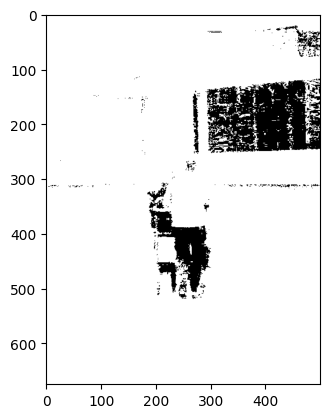

In [370]:
img = cv2.imread('crop.png')

# Apply a binary threshold
thresh, binary_img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY)
plt.imshow(binary_img)
plt.show()

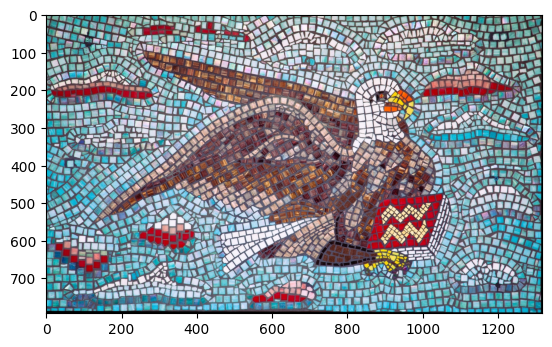

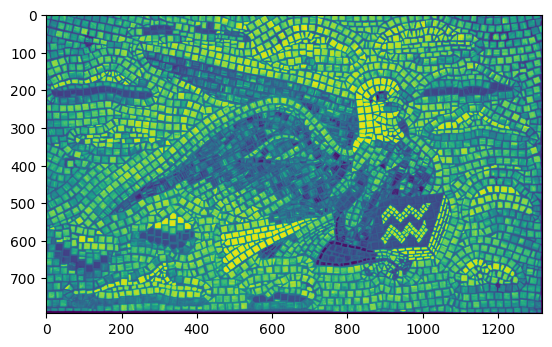

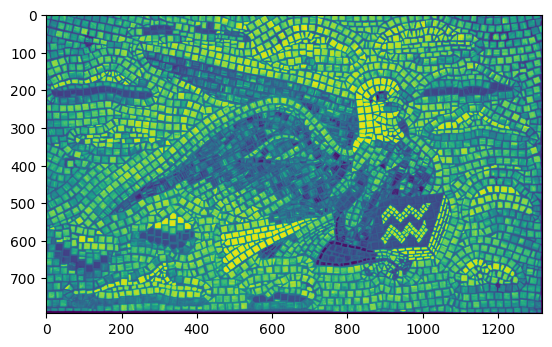

1039374 10428


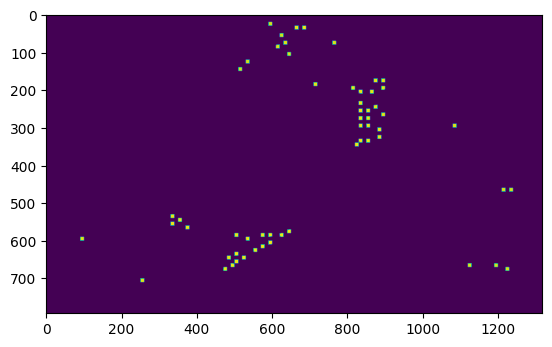

number of white tiles: 58


(-0.5, 1317.5, 792.5, -0.5)

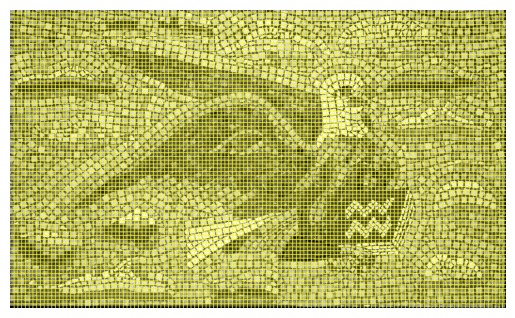

In [371]:
img = cv2.imread('FranklinMascot.jpg')
c_img = img.copy()
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()
gray = cv2.cvtColor(c_img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)
plt.show()

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
eroded = cv2.erode(gray, kernel, iterations=1)
dilated = cv2.dilate(eroded, kernel, iterations=1)
plt.imshow(gray)
plt.show()
segments = slic(gray, n_segments = 10000, compactness=1,sigma = 5)

#segments = felzenszwalb(dilated, scale=100, sigma=1, min_size=40) 
#segments = quickshift(img, kernel_size=3, max_dist=5, ratio=0.5)
props = regionprops_table(segments, intensity_image=gray, properties=('label', 'coords', 'intensity_image'))
count = 0 
num = 0 
num_white_tiles = 0
new_gray = gray.copy()
for i, prop in enumerate(props['coords']):
    coords = props['coords'][i]
    num += 1 
    intensity = props['intensity_image'][i]
    mean_intensity = np.mean(intensity)
    if (mean_intensity < 230):
        for coord in coords:
            x = coord[0]
            y = coord[1]
            new_gray[x][y] = 0
            count += 1
    else:
        num_white_tiles += 1


print(count, num)
plt.imshow(new_gray)
plt.show()

print("number of white tiles:",num_white_tiles)

# show the output of SLIC
fig = plt.figure("Superpixels -- %d segments" % (200))
ax = fig.add_subplot(1, 1, 1)
ax.imshow(mark_boundaries(gray, segments))
plt.axis("off")